# Explore Solar System

> J. Colliander, 2022-06-18

- [x] assemble data on planets in solar system
- [x] read data on planets into Pandas dataframe
- [ ] confirm Kepler's Third Law relationship for planets in solar system

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [131]:
plt.rcParams["figure.figsize"] = (20, 10)

In [132]:
ss = pd.read_csv('data/solar-system-data.csv')

In [133]:
ss

,Name,Mass (1024kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (106 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,MERCURY,0.330,4879.0,5429,3.7,4.3,1407.6,4222.6,57.9,46,...,88,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,VENUS,4.870,12104.0,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35,3.4,0.007,177.400,464,92,0,No,No
2,EARTH,5.970,12756.0,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,MOON,0.073,3475.0,3340,1.6,2.4,655.7,708.7,0.384*,0.363*,...,27.3*,1.0*,5.1,0.055,6.700,-20,0,0,No,No
4,MARS,0.642,6792.0,3934,3.7,5.0,24.6,24.7,228,206.7,...,687.00000,24.1,1.8,0.094,25.200,-65,0.01,2,No,No
5,JUPITER,1898.000,142984.0,1326,23.1,59.5,9.9,9.9,778.5,740.6,...,4331.00000,13.1,1.3,0.049,3.100,-110,Unknown*,79,Yes,Yes
6,SATURN,568.000,120536.0,687,9.0,35.5,10.7,10.7,1432,1357.6,...,10747.00000,9.7,2.5,0.052,26.700,-140,Unknown*,82,Yes,Yes
7,URANUS,86.800,51118.0,1270,8.7,21.3,-17.2,17.2,2867,2732.7,...,30589.00000,6.8,0.8,0.047,97.800,-195,Unknown*,27,Yes,Yes
8,NEPTUNE,102.000,49528.0,1638,11.0,23.5,16.1,16.1,4515,4471.1,...,59800.00000,5.4,1.8,0.010,28.300,-200,Unknown*,14,Yes,Yes
9,PLUTO,0.013,2376.0,1850,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560.00000,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [134]:
# Ignore the moon
ss = ss.drop([3]).reset_index(drop=True)

In [135]:
ss['pl_name'] = ss['Name']
ss['pl_masse']= ss['Mass (1024kg)']/5.970
ss['pl_massj']= ss['Mass (1024kg)']/1898
ss['pl_orbper'] = ss['Orbital Period (days)'].astype(float)
ss['pl_orbsmax']=ss['Distance from Sun (106 km)'].astype(float)/149.6 # in AU

<AxesSubplot:xlabel='pl_orbper'>

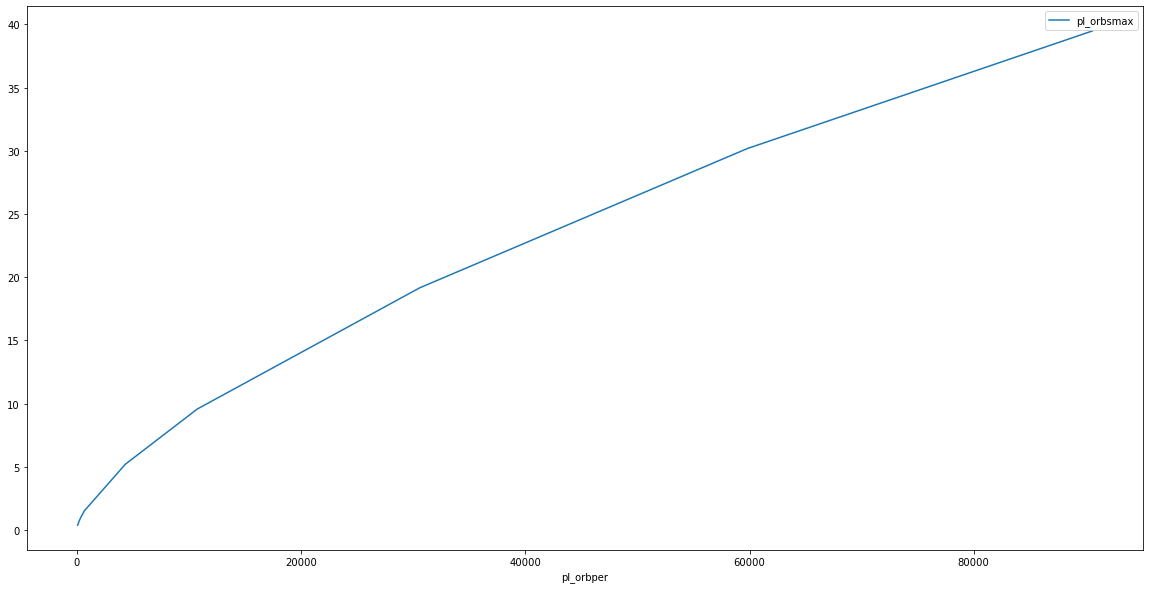

In [136]:
ss.plot(x = 'pl_orbper', y = 'pl_orbsmax')

In [137]:
# I took some ideas from this video: https://www.youtube.com/watch?v=4vryPwLtjIY

In [138]:
T = ss['pl_orbper'].values

In [139]:
T

array([8.8000e+01, 2.2470e+02, 3.6520e+02, 6.8700e+02, 4.3310e+03,
       1.0747e+04, 3.0589e+04, 5.9800e+04, 9.0560e+04])

In [140]:
# Kepler's Third Law Form with a coefficient to be determined
def kep(t,c0):
    return c0 * np.float_power(t,2/3)

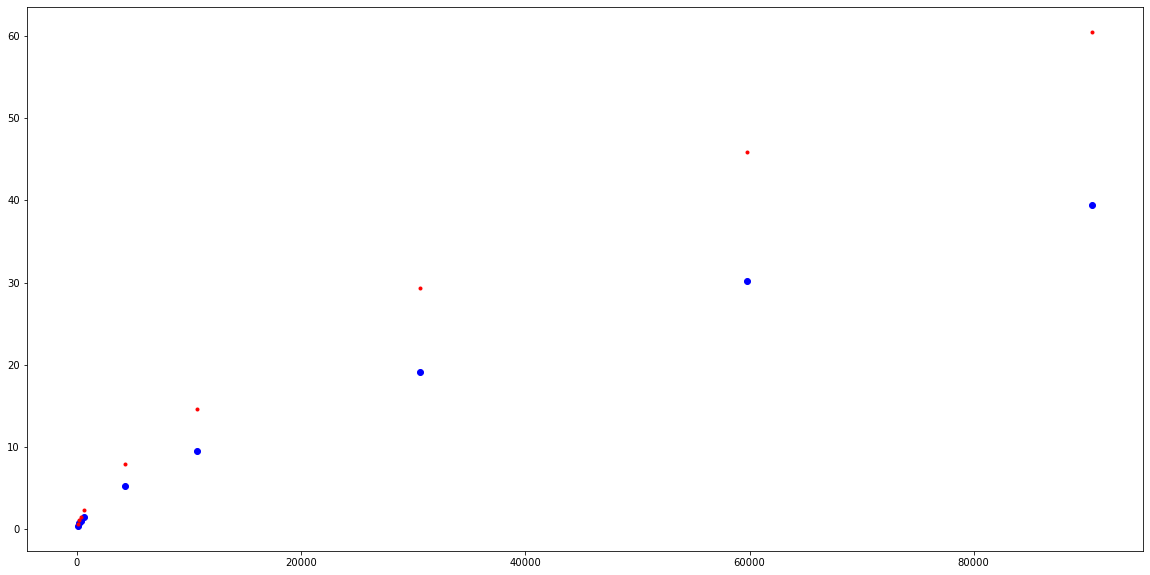

In [141]:
n = len(ss['pl_orbper'])
y = np.empty(n)

for i in range(n):
    y[i] = kep(ss['pl_orbper'][i],.03)


plt.plot(ss['pl_orbper'],ss['pl_orbsmax'], 'bo')
plt.plot(ss['pl_orbper'],y,'r.')

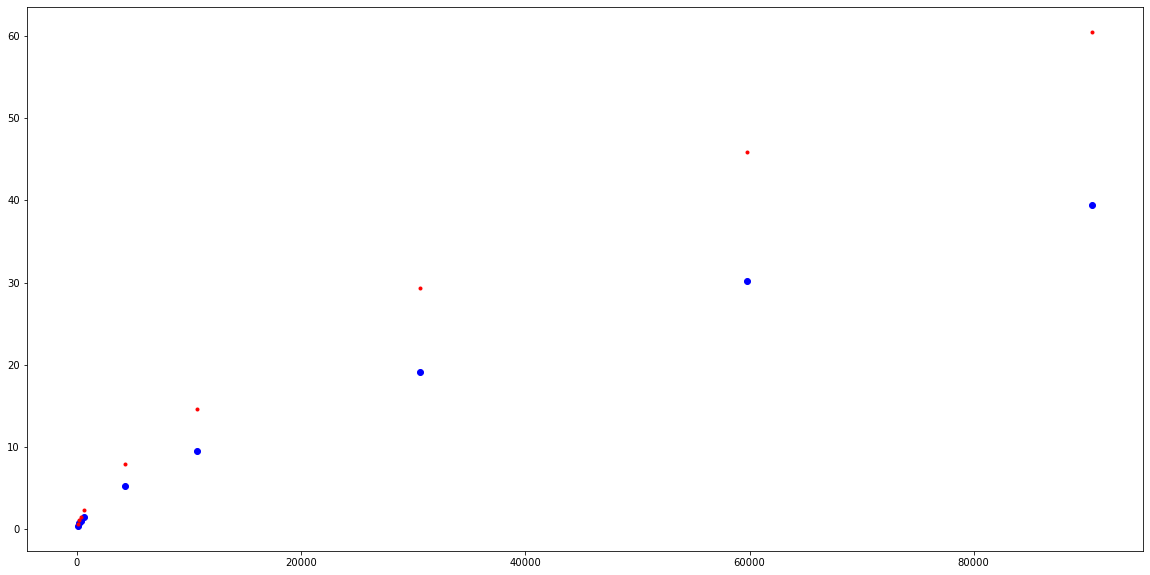

In [142]:


plt.plot(ss['pl_orbper'],ss['pl_orbsmax'], 'bo')
plt.plot(ss['pl_orbper'],y,'r.')

## Use curvefit

In [143]:
from scipy.optimize import curve_fit
T = ss['pl_orbper'].values
SMA = ss['pl_orbsmax'].values
c,cov = curve_fit(kep,T,SMA,0.03) 
print(c)

[0.0196305]


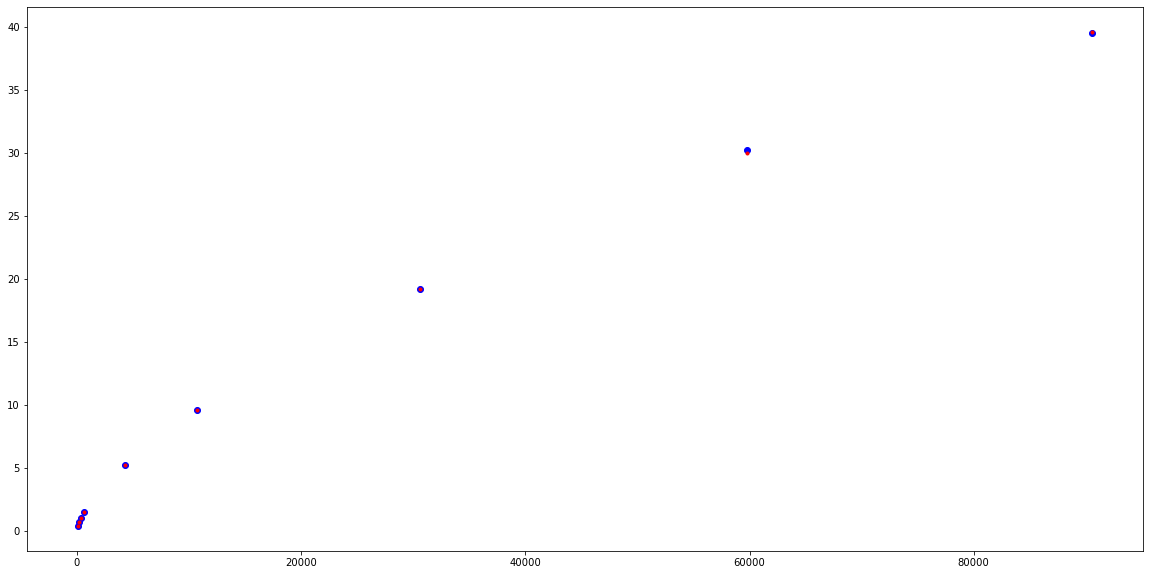

In [144]:
n = len(ss['pl_orbper'])
y = np.empty(n)

for i in range(n):
    y[i] = kep(ss['pl_orbper'][i],c)


plt.plot(ss['pl_orbper'],ss['pl_orbsmax'], 'bo')
plt.plot(ss['pl_orbper'],y,'r.')